<a href="https://colab.research.google.com/github/Margauxxxxxxx/NLP_Project/blob/master/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for NLP Project**

### Prediction of movies rating - Camille Jehle and Margaux Thorez


We are going to use a corpus containing stories of films from the IMDB to predict the vote for a movie. For that we are going to use the movies_metadata.csv database. We will use NLP tools to add the overview as an explainatory variable. 

### **I - Preliminary Data Analysis**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In order to get the movies_metadata.csv file, you need to upload in the runtime the file that is located in the Github. 

In [0]:
#Importation of the database
url = 'copied_raw_GH_link'
df = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
s = 'Movies database has {:,} rows and {:,} columns'
print(s.format(df.shape[0], df.shape[1]))
df.head(5)

Movies database has 45,466 rows and 24 columns


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


We start by studying the numeric variables. For some of them there are no only numeric variables, so we drop those rows. 

In [0]:
result = df[(df['popularity'].str.isnumeric()==False)]
df_pop=df.drop(result.index)
df_pop.popularity=df_pop.popularity.apply(float)

In [0]:
result = df_pop[(df_pop['budget'].str.isnumeric()==False)]
df_pop=df_pop.drop(result.index)
df_pop.budget=df_pop.budget.apply(float)

In [0]:
#Description of numeric variables
df_pop.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.276700e+04,32764.000000,3.276400e+04,32659.000000,32764.000000,32764.000000
mean,5.343945e+06,3.393351,1.427322e+07,96.836615,5.745278,137.997284
std,1.946523e+07,6.026626,7.212698e+07,34.560003,1.748088,558.311251
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.517796,0.000000e+00,87.000000,5.200000,4.000000
50%,0.000000e+00,1.483600,0.000000e+00,96.000000,6.100000,13.000000
75%,0.000000e+00,4.993631,0.000000e+00,108.000000,6.800000,49.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [0]:
#Description of no numeric variables
df_pop.describe(include=[np.object])

,adult,belongs_to_collection,genres,homepage,id,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,32767,3592,32767,5358,32767,32755,32763,32767,32306,32574,32764,32764,32728,32764,32712,16832,32764,32764
unique,2,1469,3409,5294,32746,32734,84,31321,32197,32543,17254,1905,14607,1616,5,16748,30725,2
top,False,"{'id': 645, 'name': 'James Bond Collection', '...","[{'id': 18, 'name': 'Drama'}]",http://www.wernerherzog.com/films-by.html,141971,tt1180333,en,Hamlet,No overview found.,/2kslZXOaW0HmnGuVPCnQlCdXFR9.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Hamlet,False
freq,32763,26,3579,5,3,3,24630,8,72,4,7365,14534,98,17493,32511,7,9,32728


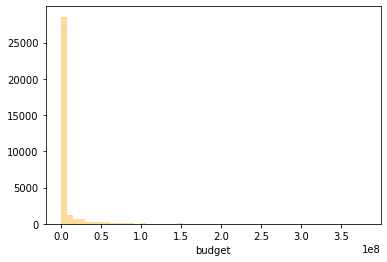

In [0]:
sns.distplot(df_pop.budget, kde=False, color='orange')

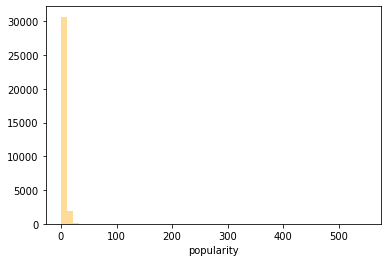

In [0]:
sns.distplot(df_pop.popularity, kde=False, color='orange')

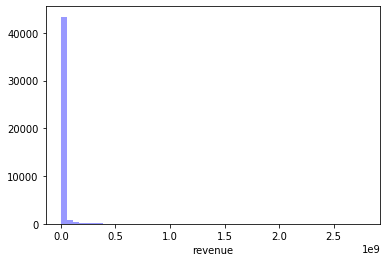

In [0]:
sns.distplot(df.revenue, kde=False, color='blue')

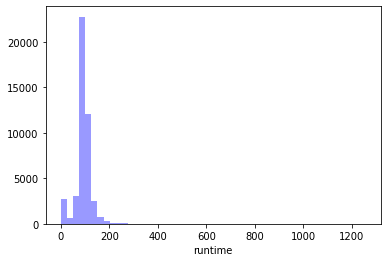

In [0]:
sns.distplot(df.runtime, kde=False, color='blue')

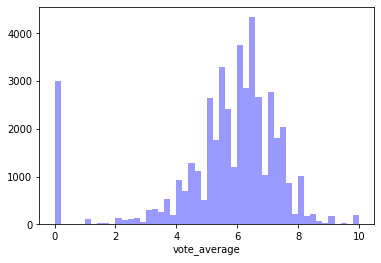

In [0]:
sns.distplot(df.vote_average, kde=False, color='blue')

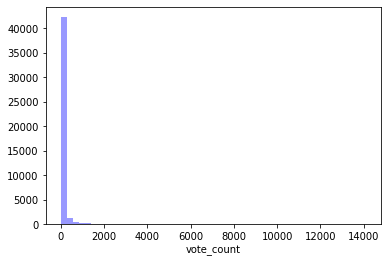

In [0]:
sns.distplot(df.vote_count, kde=False, color='blue')

Regarding the movies desciption, more than 75% have no revenue, and some of them have no runtime. Revenue might then not been a good explainatory variable, and we might have to remove the movies that have no runtime. Finally, we can see that some movies have a very high runtime in comparison with the other movies, so we might see them as outliers... 

We can see that the most part of the average vote are between 5 and 6.8 (50%). Moreover, more than 75% of the movies have been ranked by less than 40 spectators. 

Now let's visualize the bivariate distribution and correlation of some variables with the variable of interest "vote_average" in a scatterplot.

In [0]:
from scipy.stats import pearsonr

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1169: Runtim

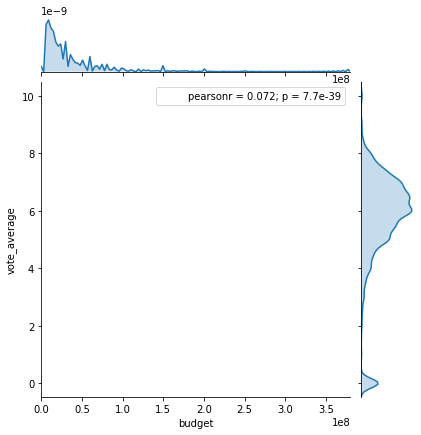

In [0]:
sns.jointplot(x='budget', y='vote_average', data=df_pop, kind='kde').annotate(pearsonr)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


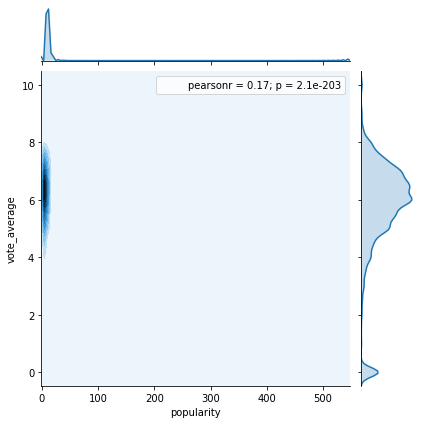

In [0]:
sns.jointplot(x='popularity', y='vote_average', data=df_pop, kind='kde').annotate(pearsonr)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


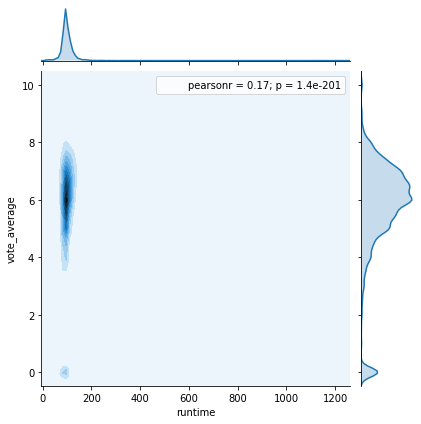

In [0]:
sns.jointplot(x='runtime', y='vote_average', data=df_pop, kind='kde').annotate(pearsonr)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


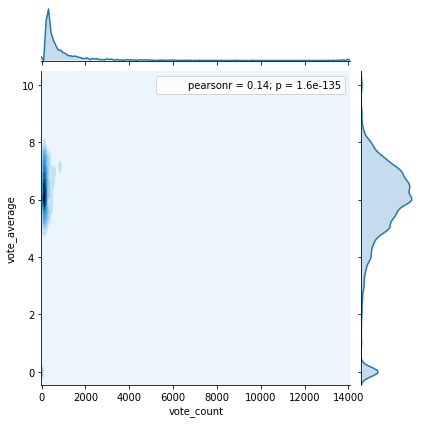

In [0]:
sns.jointplot(x='vote_count', y='vote_average', data=df_pop, kind='kde').annotate(pearsonr)

In [0]:
#We count missing values per column in order to understand which variables we are going to use 
df.isnull().sum(axis=0)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

Now lets study the "genres" variable, which can be a good explainatory variable for the vote of a movie :


In [0]:
#Number of different genres (including combinasions)
print(len(df.genres.unique()))

4069


In [0]:
#We are now going to separate the genres that are in a dictionnary applying literal_eval

from ast import literal_eval

df_genres = df.copy()
df_genres['genres'] = df_genres['genres'].fillna('[]')
df_genres['genres'] = df_genres['genres'].apply(literal_eval)
df_genres['genres'] = df_genres['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [0]:
#For the data analysis, we are going to create a new dataframe with one row per genre per movie (so a movie with more than one genre is going to appear more than one time)

g = df_genres.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
g.name = 'genre'
df_genre_solo = df_genres.drop('genres', axis=1).join(g)

df_genre_solo.head(5)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Family
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Adventure
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Fantasy


In [0]:
#Number of different genres
print(len(df_genre_solo.genre.unique()))

33


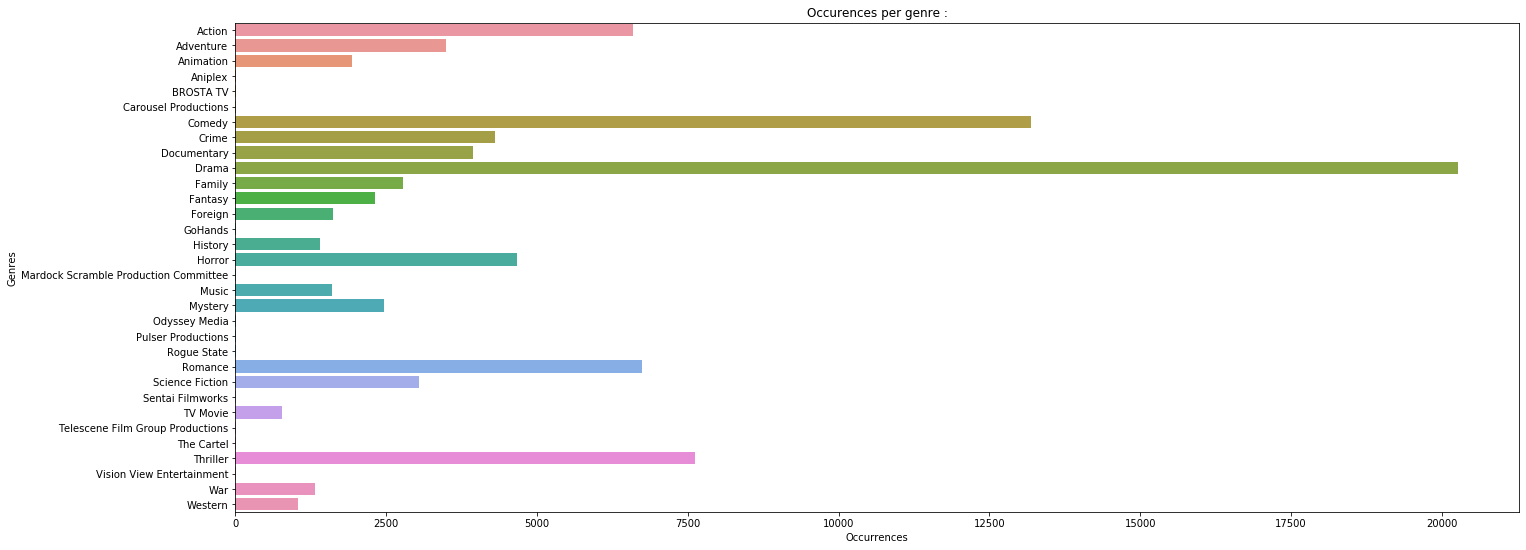

In [0]:
#We plot the occurences per genres in order to see which are the most represented
genre_count = df_genre_solo['genre'].value_counts().sort_index()
df_genre_count = pd.DataFrame({'genre': genre_count.index, 'count': genre_count.values})
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y = 'genre', data=df_genre_count)
ax.set_title('Occurences per genre :')
ax.set_xlabel('Occurrences')
ax.set_ylabel('Genres')
plt.show()

We can see that some genres are more represented that other ones. 

Now lets study the "overview" variable : 

Mean Length of overviews : 324.3519454726009


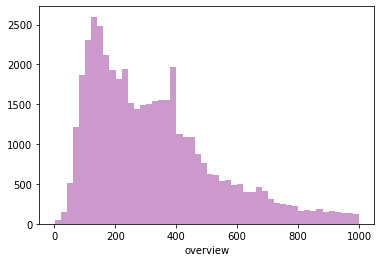

In [0]:
# Length of overviews in characters
df.overview =df.overview.apply(str) 
print("Mean Length of overviews :", df.overview.drop_duplicates().apply(len).mean())
#Distribution of overview's lenght
sns.distplot(df.overview.drop_duplicates().apply(len), bins=50, kde=False, color='purple')

### **II - Data preprocessing**

After the data analysis, we are going to drop some variables that does not seem to be very interesting for the prediction of the rating. Thus we are going to drop : "homepage", "imdb_id" (keeping "id" is enought), "poster_path", "status" and "video".


In [0]:
df = df.drop(['homepage', 'imdb_id', 'poster_path', 'status','video','original_title'], axis=1)

We are not going to keep the variable 'original_language' because it is correlated with the 'production_countries' and the 'spoken_languages'. 

In [0]:
df = df.drop(['original_language'], axis=1)

Now lets transform the variable "adult" in a dummy variable. 

In [0]:
df['adult'] = pd.get_dummies(df['adult'])

We change the variable "belongs_to_collection" in whether the movie belongs to a collection or not. 

In [0]:
df['belongs_to_collection'] = pd.isna(df['belongs_to_collection'])

In [0]:
df['belongs_to_collection'] = pd.get_dummies(df['belongs_to_collection'])

We create two new variables from 'release_date' : 'year' and 'month'. 

In [0]:
#Creation of new variables 'year' and 'month' instead of 'release-date'
df=df.dropna(subset=['release_date'])
df['release_date']=df['release_date'].astype(str)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%Y-%m-%d')
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month
df = df.drop(['release_date'], axis=1)

In [0]:
df.head(3)

,adult,belongs_to_collection,budget,genres,id,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,year,month
0,0,1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,1995.0,10.0
1,0,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,12.0
2,0,1,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,12.0


In order to use the values that are contained in the dictionnaries we create a function that extract the information out the string columns that contain lists of dictionaries, and then we reate dummy columns for the categorical columns. Nevertheless, there are too many production companies (17254) so we are going to drop this column.

In [0]:
df = df.drop(['production_companies'], axis=1)

In [0]:
#We create a function that extract the information out the string columns that contain lists of dictionaries

import re

patternname = r"(?:.name.: .)(\w{1,}\s{0,}\w{0,})"
patternlang = r"(?:.iso_639_1.: .)(\w{1,}\s{0,}\w{0,})"

def dict2list(x):
    if type(x) is str:
        templist = x.strip('[]').split(',')
        namelist = []
        lang = False
        for element in templist:
            if re.search(patternlang, element):
                namelist.append(re.search(patternlang, element).group(0)[14:])
                lang = True
            elif re.search(patternname, element) and not lang:
                namelist.append(re.search(patternname, element).group(0)[9:])
        if len(namelist) > 0:
            return {k: 1 for k in namelist}
        else:
            return x
    else:
        return x

df_extrait = df.applymap(dict2list)

In [0]:
#We now use the created dictionaries to create dummy columns for the categorical columns

def dict2dummy(df,columns):
    columnnames = {}
    for col in columns:
        columnnames[col] = list(df[col].apply(pd.Series).drop([0], axis=1))
        df = pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series).fillna(0).drop([0], axis=1)], axis=1)
    return df,columnnames


In [0]:
dummyfeatures = ['production_countries']
df_extrait,columndictionary = dict2dummy(df_extrait,dummyfeatures)

In [0]:
#Values taken by the variable 'production_countries'
print(columndictionary)

{'production_countries': ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Cote D', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'French Polynesia', 'French Southern', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyz Republic', 'Lao People', 'Latvia', 'Lebanon', 'L

In [0]:
dummyfeatures = ['spoken_languages']
df_extrait,columndictionary = dict2dummy(df_extrait,dummyfeatures)

In [0]:
#Values taken by the variable 'spoken_languages'
print(columndictionary)

{'spoken_languages': ['ab', 'af', 'am', 'ar', 'as', 'ay', 'az', 'be', 'bg', 'bi', 'bm', 'bn', 'bo', 'br', 'bs', 'ca', 'ce', 'cn', 'co', 'cr', 'cs', 'cy', 'da', 'de', 'dz', 'el', 'en', 'eo', 'es', 'et', 'eu', 'fa', 'ff', 'fi', 'fo', 'fr', 'fy', 'ga', 'gd', 'gl', 'gn', 'gu', 'ha', 'he', 'hi', 'hr', 'ht', 'hu', 'hy', 'id', 'ig', 'is', 'it', 'iu', 'ja', 'jv', 'ka', 'ki', 'kk', 'km', 'kn', 'ko', 'ku', 'kw', 'ky', 'la', 'lb', 'ln', 'lo', 'lt', 'lv', 'mh', 'mi', 'mk', 'ml', 'mn', 'mr', 'ms', 'mt', 'my', 'nb', 'ne', 'nl', 'no', 'nv', 'ny', 'oc', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro', 'ru', 'rw', 'sa', 'sc', 'se', 'sg', 'sh', 'si', 'sk', 'sl', 'sm', 'sn', 'so', 'sq', 'sr', 'st', 'sv', 'sw', 'ta', 'te', 'tg', 'th', 'tk', 'tl', 'tn', 'to', 'tr', 'tt', 'ty', 'ug', 'uk', 'ur', 'uz', 'vi', 'wo', 'xh', 'xx', 'yi', 'zh', 'zu']}


In [0]:
dummyfeatures = ['genres']
df_extrait,columndictionary = dict2dummy(df_extrait,dummyfeatures)

In [0]:
df_extrait.head(3)

,adult,belongs_to_collection,budget,id,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,year,month,Afghanistan,Albania,Algeria,Angola,Antarctica,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Barbados,Belarus,Belgium,Bermuda,Bhutan,Bolivia,Bosnia and,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cambodia,...,uz,vi,wo,xh,xx,yi,zh,zu,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film,The Cartel,Thriller,Vision View,War,Western
0,0,1,30000000,862,"Led by Woody, Andy's toys live happily in his ...",21.9469,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,1995.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,65000000,8844,When siblings Judy and Peter discover an encha...,17.0155,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,15602,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df = df_extrait

Now we are going to drop the rows for which the main variables are NaN and those for which the variables are strings instead of numbers (as we see in the data analysis). 

In [0]:
result = df[(df['popularity'].str.isnumeric()==False)]
df=df.drop(result.index)
df.popularity=df.popularity.apply(float)

In [0]:
result = df[(df['budget'].str.isnumeric()==False)]
df=df.drop(result.index)
df.budget=df.budget.apply(float)

In [0]:
df.head(3)

,adult,belongs_to_collection,budget,id,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,year,month,Afghanistan,Albania,Algeria,Angola,Antarctica,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Barbados,Belarus,Belgium,Bermuda,Bhutan,Bolivia,Bosnia and,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cambodia,...,uz,vi,wo,xh,xx,yi,zh,zu,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film,The Cartel,Thriller,Vision View,War,Western
0,0,1,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,1995.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0.0,15602,A family wedding reignites the ancient feud be...,11.712900,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally, we are going drop the colums that are only going to be used fot the model using NLP ('overview', 'title', 'tagline'). Moreover, we drop the id which is not going to be used for the prediction. 

In [0]:
df_noNLP = df.drop(['overview','tagline', 'title'], axis=1)
df_noNLP = df_noNLP.drop(['id'], axis=1)

In [0]:
#We keep only the rows without NaN
df_noNLP=df_noNLP.dropna()

In [0]:
s = 'The prediction database without NLP has {:,} rows and {:,} columns'
print(s.format(df_noNLP.shape[0], df_noNLP.shape[1]))
df_noNLP.head(3)

The prediction database without NLP has 32,626 rows and 333 columns


,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,year,month,Afghanistan,Albania,Algeria,Angola,Antarctica,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Barbados,Belarus,Belgium,Bermuda,Bhutan,Bolivia,Bosnia and,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Cayman Islands,Chad,...,uz,vi,wo,xh,xx,yi,zh,zu,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,GoHands,History,Horror,Mardock Scramble,Music,Mystery,Odyssey Media,Pulser Productions,Rogue State,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film,The Cartel,Thriller,Vision View,War,Western
0,0,1,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1995.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1995.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0.0,11.712900,0.0,101.0,6.5,92.0,1995.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **III - Prediction models without NLP**

Creation of the bases X (explainatory variables) and Y (variable to predict).

In [0]:
Y= df_noNLP['vote_average']
X= df_noNLP.drop(['vote_average'], axis=1)

In [0]:
#We divided the database in train and test randomnly
msk = np.random.rand(len(Y)) < 0.8
Y_train = Y[msk]
Y_test = Y[~msk]
X_train = X[msk]
X_test= X[~msk]

Lets train different models with our bases.

In [0]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [0]:
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


We start with Regression model 

In [0]:
#Linear Regression
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred= regr.predict(X_test)

In [0]:
print('R^2 : ', r2_score(Y_test, Y_pred))
mae_regr = metrics.mean_absolute_error(Y_test, Y_pred)
mse_regr = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Absolute Error :', mae_regr)  
print('Mean Squared Error :', mse_regr)  

R^2 :  0.11918691922980873
Mean Absolute Error : 1.0816508834564365
Mean Squared Error : 2.5767056162362145


In [0]:
#Ridge Regression

ridge=linear_model.Ridge()
ridge.fit(X_train,Y_train)
Y_pred=ridge.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.46842e-21): result may not be accurate.
  overwrite_a=True).T


In [0]:
print('R^2 : ', r2_score(Y_test, Y_pred))
mae_ridge = metrics.mean_absolute_error(Y_test, Y_pred)
mse_ridge = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Absolute Error :', mae_ridge)  
print('Mean Squared Error :', mse_ridge) 

R^2 :  0.12215856009108217
Mean Absolute Error : 1.0791920599772051
Mean Squared Error : 2.568012462303958


In [0]:
#Lasso Regression

lasso=linear_model.Lasso(alpha=0.0001)
lasso.fit(X_train,Y_train)
Y_pred=lasso.predict(X_test)

In [0]:
print('R^2 : ', r2_score(Y_test, Y_pred))
mae_lasso = metrics.mean_absolute_error(Y_test, Y_pred)
mse_lasso = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Absolute Error :', mae_lasso)  
print('Mean Squared Error :', mse_lasso) 

R^2 :  0.12351040255864498
Mean Absolute Error : 1.0776223868569397
Mean Squared Error : 2.564057820672853


We now try a Random Forest model

In [0]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor 

rf=RandomForestRegressor(random_state=0, max_features='auto', n_estimators= 50, max_depth=5)

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

In [0]:
print('Mean Absolute Error :', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error :', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error : 0.7938638904830316
Mean Squared Error : 1.1904291984247937


In [0]:
#We use GridSearchCV to choose the best parameters
#We choose the maximum of n_estimators to test at 200 because it is too long otherwise

param_grid = { 
    'n_estimators': [20, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(5, 10)
}

CV_regressor = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_regressor.fit(X_train, Y_train)

best_params = CV_regressor.best_params_
best_params

{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}

In [0]:
#Random Forest with best parameters

rf=RandomForestRegressor(random_state=0, max_features='auto', n_estimators= 200, max_depth=9)

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

In [0]:
mae_rf = metrics.mean_absolute_error(Y_test, Y_pred)
mse_rf = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Absolute Error :', mae_rf)  
print('Mean Squared Error :', mse_rf)  

Mean Absolute Error : 0.7208336371857801
Mean Squared Error : 1.044353607594285


In [0]:
#Variables importance : we only show the 15 most important variables

rf.fit(X_train, Y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Classement de l'importance des paramètres:")

for f in range(15):
    i=indices[f]
    print("%d. paramètre %d : " % (f + 1, i) + X_train.columns[i] + " (%f)" % (importances[i]))

Classement de l'importance des paramètres:
1. paramètre 6 : vote_count (0.914625)
2. paramètre 5 : runtime (0.033205)
3. paramètre 308 : Documentary (0.021774)
4. paramètre 315 : Horror (0.015019)
5. paramètre 7 : year (0.010521)
6. paramètre 194 : en (0.003252)
7. paramètre 161 : United States (0.000613)
8. paramètre 3 : popularity (0.000255)
9. paramètre 2 : budget (0.000135)
10. paramètre 228 : ko (0.000116)
11. paramètre 169 : af (0.000083)
12. paramètre 8 : month (0.000062)
13. paramètre 249 : nl (0.000056)
14. paramètre 314 : History (0.000043)
15. paramètre 130 : Romania (0.000043)


We can see that the most important variables to explain the 'vote_average' are quite logic : the 'vote_count', 'popularity' and 'budget' are quite important as some genres such as 'Documentary', 'Horror', 'Drama'. We also have the 'year' and the 'month' that can play an important role (maybe most famous movies in a certain period of the year).  

Gradient Booster builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [0]:
#Gradient Booster 
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(loss='ls',n_estimators=20,learning_rate=0.1,max_features='auto')

gbr.fit(X_train,Y_train)
Y_pred = gbr.predict(X_test)

In [0]:
print('Mean Absolute Error :', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error :', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error : 0.8333414323983919
Mean Squared Error : 1.2318850972281785


In [0]:
#We use GridSearchCV to choose the best parameters for the model

param_grid = { 
    'loss' : ['ls', 'lad', 'huber'],
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['auto', 'sqrt', 'log2'],
}

XGB_grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv= 5)
XGB_grid_search.fit(X_train, Y_train)

best_params=XGB_grid_search.best_params_
best_params

{'learning_rate': 0.3,
 'loss': 'huber',
 'max_features': 'auto',
 'n_estimators': 200}

In [0]:
gbr = GradientBoostingRegressor(loss='huber',n_estimators=200,learning_rate=0.3,max_features='auto')

gbr.fit(X_train,Y_train)
Y_pred = gbr.predict(X_test)

In [0]:
mae_gbr = metrics.mean_absolute_error(Y_test, Y_pred)
mse_gbr = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Absolute Error :', mae_gbr)  
print('Mean Squared Error :', mse_gbr)  

Mean Absolute Error : 0.690669400702134
Mean Squared Error : 0.9766218836632482


We try other models 

In [0]:
#Knn Algorithm
from sklearn import neighbors

knn=neighbors.KNeighborsRegressor(10,weights='uniform')
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

In [0]:
mae_knn = metrics.mean_absolute_error(Y_test, Y_pred)
mse_knn = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Absolute Error :', mae_knn)  
print('Mean Squared Error :', mse_knn) 

Mean Absolute Error : 1.0536680074257425
Mean Squared Error : 2.2328369585396035


### **IV - Datapreprocessing for NLP**

### **V - Prediction models using NLP**

### **VI - Comparison of the models**

Now we are going to compare the models that use NLP methods with those that not. 

In [0]:
MAE=[mae_regr,mae_ridge,mae_lasso,mae_rf,mae_gbr,mae_knn]
MSE=[mse_regr,mse_ridge,mse_lasso,mse_rf,mse_gbr,mse_knn]

col={'Mean Absolute Error':MAE,'Mean Squared Error':MSE}
models=['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'Gradient Boost','KNN']
df_compare=pd.DataFrame(data=col,index=models)
df_compare

,Mean Absolute Error,Mean Squared Error
Linear Regression,1.081651,2.576706
Ridge,1.079192,2.568012
Lasso,1.077622,2.564058
Random Forest,0.720834,1.044354
Gradient Boost,0.690669,0.976622
KNN,1.053668,2.232837


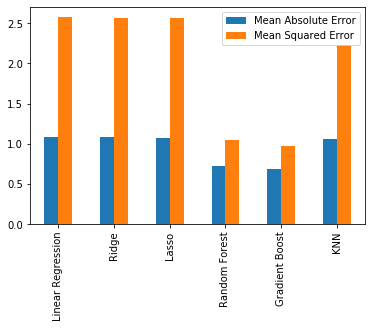

In [0]:
df_compare.plot(kind='bar')